<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


#  Multi-class Classification


Estimated time needed: **30** mins


In this lab, you will learn the different strategies of Multi-class classification and implement the same on a real-world dataset.


## **Objectives**


After completing this lab you will be able to:


1. Understand the use of one-hot encoding for categorical variables.
2. Implement logistic regression for multi-class classification using **One-vs-All (OvA)** and **One-vs-One (OvO)** strategies.
3. Evaluate model performance using appropriate metrics.


## Import Necessary Libraries


First, to ensure the availability of the required libraries, execute the cell below.


In [20]:
# !pip install numpy==2.2.0
# !pip install pandas==2.2.3
# !pip install scikit-learn==1.6.0
# !pip install matplotlib==3.9.3
# !pip install seaborn==0.13.2

Now, import the necessary libraries for data processing, model training, and evaluation.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsOneClassifier
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

## About the dataset
The data set being used for this lab is the "Obesity Risk Prediction" data set publically available on <a href="https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition">UCI Library</a> under the <a href="https://creativecommons.org/licenses/by/4.0/legalcode">CCA 4.0</a> license. The data set has 17 attributes in total along with 2,111 samples. 

The attributes of the dataset are descibed below.


<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-7zrl{text-align:left;vertical-align:bottom}
</style>
<table class="tg"><thead>
  <tr>
    <th class="tg-7zrl">Variable Name</th>
    <th class="tg-7zrl">Type</th>
    <th class="tg-7zrl">Description</th>
  </tr></thead>
<tbody>
  <tr>
    <td class="tg-7zrl">Gender</td>
    <td class="tg-7zrl">Categorical</td>
    <td class="tg-7zrl"></td>
  </tr>
  <tr>
    <td class="tg-7zrl">Age</td>
    <td class="tg-7zrl">Continuous</td>
    <td class="tg-7zrl"></td>
  </tr>
  <tr>
    <td class="tg-7zrl">Height</td>
    <td class="tg-7zrl">Continuous</td>
    <td class="tg-7zrl"></td>
  </tr>
  <tr>
    <td class="tg-7zrl">Weight</td>
    <td class="tg-7zrl">Continuous</td>
    <td class="tg-7zrl"></td>
  </tr>
  <tr>
    <td class="tg-7zrl">family_history_with_overweight</td>
    <td class="tg-7zrl">Binary</td>
    <td class="tg-7zrl">Has a family member suffered or suffers from overweight?</td>
  </tr>
  <tr>
    <td class="tg-7zrl">FAVC</td>
    <td class="tg-7zrl">Binary</td>
    <td class="tg-7zrl">Do you eat high caloric food frequently?</td>
  </tr>
  <tr>
    <td class="tg-7zrl">FCVC</td>
    <td class="tg-7zrl">Integer</td>
    <td class="tg-7zrl">Do you usually eat vegetables in your meals?</td>
  </tr>
  <tr>
    <td class="tg-7zrl">NCP</td>
    <td class="tg-7zrl">Continuous</td>
    <td class="tg-7zrl">How many main meals do you have daily?</td>
  </tr>
  <tr>
    <td class="tg-7zrl">CAEC</td>
    <td class="tg-7zrl">Categorical</td>
    <td class="tg-7zrl">Do you eat any food between meals?</td>
  </tr>
  <tr>
    <td class="tg-7zrl">SMOKE</td>
    <td class="tg-7zrl">Binary</td>
    <td class="tg-7zrl">Do you smoke?</td>
  </tr>
  <tr>
    <td class="tg-7zrl">CH2O</td>
    <td class="tg-7zrl">Continuous</td>
    <td class="tg-7zrl">How much water do you drink daily?</td>
  </tr>
  <tr>
    <td class="tg-7zrl">SCC</td>
    <td class="tg-7zrl">Binary</td>
    <td class="tg-7zrl">Do you monitor the calories you eat daily?</td>
  </tr>
  <tr>
    <td class="tg-7zrl">FAF</td>
    <td class="tg-7zrl">Continuous</td>
    <td class="tg-7zrl">How often do you have physical activity?</td>
  </tr>
  <tr>
    <td class="tg-7zrl">TUE</td>
    <td class="tg-7zrl">Integer</td>
    <td class="tg-7zrl">How much time do you use technological devices such as cell phone, videogames, television, computer and others?</td>
  </tr>
  <tr>
    <td class="tg-7zrl">CALC</td>
    <td class="tg-7zrl">Categorical</td>
    <td class="tg-7zrl">How often do you drink alcohol?</td>
  </tr>
  <tr>
    <td class="tg-7zrl">MTRANS</td>
    <td class="tg-7zrl">Categorical</td>
    <td class="tg-7zrl">Which transportation do you usually use?</td>
  </tr>
  <tr>
    <td class="tg-7zrl">NObeyesdad</td>
    <td class="tg-7zrl">Categorical</td>
    <td class="tg-7zrl">Obesity level</td>
  </tr>
</tbody></table>


### Load the dataset

Load the data set by executing the code cell below.


In [2]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/GkDzb7bWrtvGXdPOfk6CIg/Obesity-level-prediction-dataset.csv"
data = pd.read_csv(file_path)
data.head()

Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        Normal_Weight  
3                Walking   Overweight_Level_I  
4  Public_Transportation  Overweight_Level_II

## Exploratory Data Analysis


Visualize the distribution of the target variable to understand the class balance.


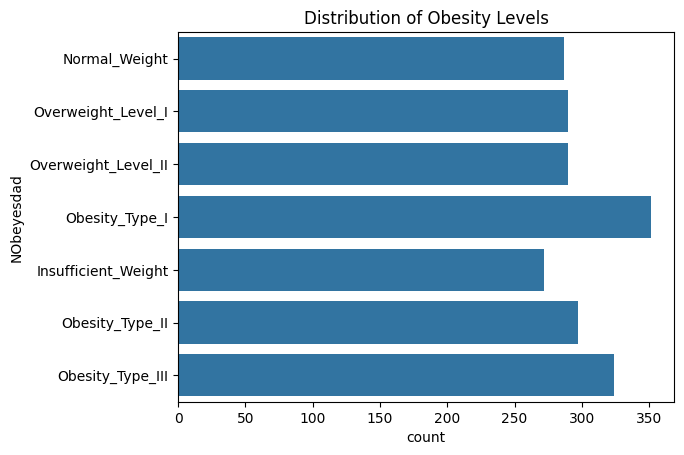

In [3]:
# Distribution of target variable
# Áî® Seaborn ÁªòÂà∂‰∏Ä‰∏™Êù°ÂΩ¢ÂõæÔºåÂ±ïÁ§∫ obesity levelÔºàËÇ•ËÉñÁ≠âÁ∫ßÔºâÁöÑÂàÜÂ∏ÉÊÉÖÂÜµ„ÄÇ
# Âõ†‰∏∫ÊòØ y='...'ÔºåÊâÄ‰ª•Êù°ÂΩ¢ÂõæÊòØ Ê®™ÂêëÁöÑÔºàÊù°ÂΩ¢‰ªéÂ∑¶Âà∞Âè≥ÔºâÔºå 
# Êù°ÂΩ¢ÁöÑÈïøÂ∫¶Ë°®Á§∫ËØ•Á±ªÂà´Âú®Êï∞ÊçÆÈõÜ‰∏≠Âá∫Áé∞ÁöÑ Ê†∑Êú¨Êï∞ÈáèÔºàcountÔºâ
sns.countplot(y='NObeyesdad', data=data) 
plt.title('Distribution of Obesity Levels')
plt.show()

This shows that the dataset is fairly balanced and does not require any special attention in terms of biased training.


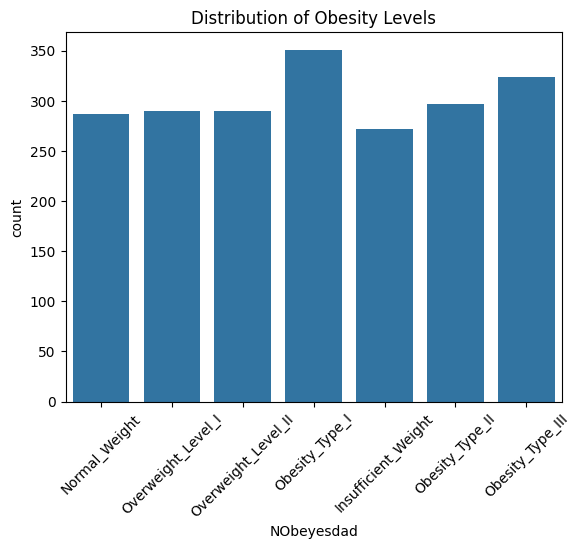

In [4]:
sns.countplot(x='NObeyesdad', data=data)
plt.xticks(rotation=45)  # ÈÅøÂÖçÊ†áÁ≠æÈáçÂè†
plt.title('Distribution of Obesity Levels')
plt.show()

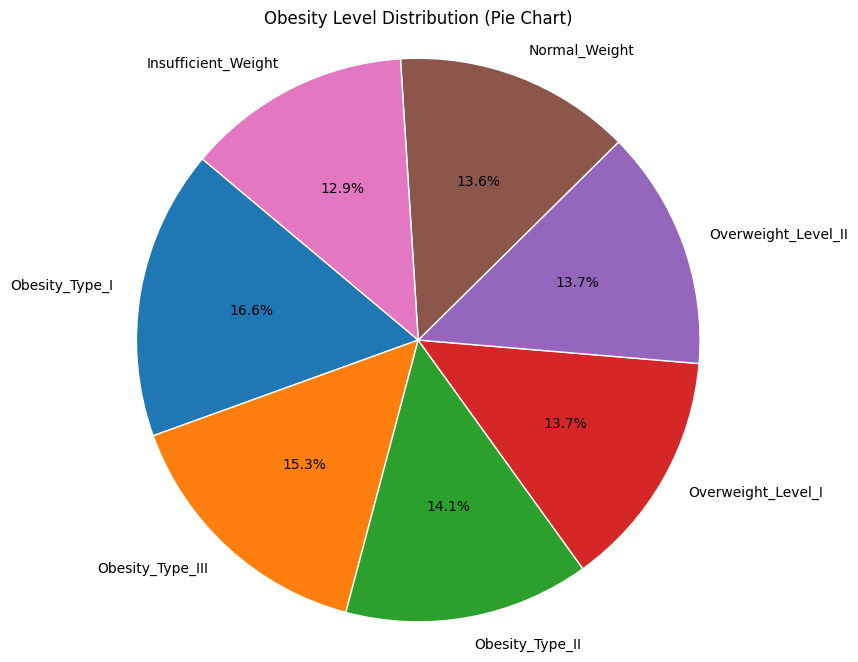

In [5]:
import matplotlib.pyplot as plt

# ÁªüËÆ°ÊØè‰∏™ obesity level ÁöÑÊ†∑Êú¨Êï∞Èáè
obesity_counts = data['NObeyesdad'].value_counts()

# ÁªòÂà∂È•ºÂõæ
plt.figure(figsize=(8, 8))
plt.pie(
    obesity_counts,
    labels=obesity_counts.index,
    autopct='%1.1f%%',     # ÊòæÁ§∫ÁôæÂàÜÊØî
    startangle=140,        # Ëµ∑ÂßãËßíÂ∫¶
    wedgeprops={'edgecolor': 'white'}  # Âä†ÁôΩËæπÊõ¥Ê∏ÖÊô∞
)
plt.title('Obesity Level Distribution (Pie Chart)')
plt.axis('equal')  # ‰øùÊåÅÂúÜÂΩ¢
plt.show()

### Exercise 1
Check for null values, and display a summary of the dataset (use `.info()` and `.describe()` methods).


In [6]:
# Checking for null values
print(data.isnull().sum())

# Dataset summary
print(data.info())
print(data.describe())

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height             

<details><summary>Click here for the solution</summary>

```python
# Checking for null values
print(data.isnull().sum())

# Dataset summary
print(data.info())
print(data.describe())
```
</details>


Expected Output:

* Counts of null values for each column (likely zero for this dataset).
* Dataset info including column names, data types, and memory usage.
* Descriptive statistics for numerical columns.


## Preprocessing the data


### Feature scaling
Scale the numerical features to standardize their ranges for better model performance.


In [7]:
# Standardizing continuous numerical features
# ‰ªé data Ëøô‰∏™ DataFrame ‰∏≠ÔºåÈÄâÂá∫ÊâÄÊúâ float64 Á±ªÂûãÁöÑÂàóÂêç„ÄÇ ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
# Ëøô‰∫õÈÄöÂ∏∏Â∞±ÊòØ‰Ω†Ë¶ÅËøõË°åÊ†áÂáÜÂåñÁöÑ ËøûÁª≠Êï∞ÂÄºÂûãÁâπÂæÅ„ÄÇ
continuous_columns = data.select_dtypes(include=['float64']).columns.tolist()
print(continuous_columns)

# Ë∞ÉÁî® .fit_transform() ÂØπÈÄâÂá∫ÁöÑËøûÁª≠ÁâπÂæÅÂàóÂÅöÊ†áÂáÜÂåñÂ§ÑÁêÜ„ÄÇ
# ÊØè‰∏ÄÂàóÂèòÊàêÔºöÂùáÂÄº ‚âà 0ÔºåÊ†áÂáÜÂ∑Æ ‚âà 1„ÄÇ
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[continuous_columns])

# Converting to a DataFrame
# ÊääÊ†áÂáÜÂåñÂêéÁöÑNumPy Êï∞ÁªÑËΩ¨Êç¢‰∏∫ DataFrameÔºåÂπ∂ÁªôÊ†áÂáÜÂåñÂêéÁöÑÊï∞ÁªÑÂàóË¥¥‰∏äÂéüÊù•ÁöÑÂêçÂ≠óÊ†áÁ≠æ
scaled_df = pd.DataFrame(scaled_features, columns=scaler.get_feature_names_out(continuous_columns))

# Combining with the original dataset
# ÊääÂéüÊù•Ê≤°ÊúâÊ†áÂáÜÂåñÁöÑÂàóÊäõÂºÉÔºåÂâ©‰∏ãÁöÑÂíåÊ†áÂáÜÂåñÂêéÁöÑÂàóÂêàÂπ∂
scaled_data = pd.concat([data.drop(columns=continuous_columns), scaled_df], axis=1)

['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']


Standardization of data is important to better define the decision boundaries between classes by making sure that the feature variations are in similar scales. The data is now ready to be used for training and testing.


### One-hot encoding
Convert categorical variables into numerical format using one-hot encoding.


One-Hot ÁºñÁ†ÅÔºàOne-Hot EncodingÔºâÊòØ‰∏ÄÁßçÂ∞ÜÂàÜÁ±ªÂèòÈáèÔºàcategorical variablesÔºâËΩ¨Êç¢‰∏∫Êï∞ÂÄºË°®Á§∫ÁöÑÊñπÊ≥ïÔºåÂÆÉÁöÑÊ†∏ÂøÉÊÄùÊÉ≥ÊòØÔºö
‚úÖ Áî®‰∏ÄÁªÑ 0 Âíå 1 ÁöÑ‰∫åËøõÂà∂ÂêëÈáèÔºåÊù•Ë°®Á§∫ÊØè‰∏Ä‰∏™‰∏çÂêåÁöÑÁ±ªÂà´„ÄÇ

üîπ ‰∏∫‰ªÄ‰πàÈúÄË¶Å One-Hot ÁºñÁ†ÅÔºü
Êú∫Âô®Â≠¶‰π†ÁÆóÊ≥ïÔºàÂ∞§ÂÖ∂ÊòØÁ∫øÊÄßÊ®°Âûã„ÄÅÁ•ûÁªèÁΩëÁªúÁ≠âÔºâ‰∏çËÉΩÁõ¥Êé•Â§ÑÁêÜÊñáÂ≠óÊàñÂ≠óÁ¨¶‰∏≤ÔºåÂÆÉ‰ª¨Âè™ËÉΩÂ§ÑÁêÜÊï∞Â≠ó„ÄÇ
ÊØîÂ¶ÇÔºö‚ÄúGender‚Äù ÂàóÊúâ‰∏§‰∏™Á±ªÂà´ÔºöMale Âíå FemaleÔºå‰Ω†‰∏çËÉΩÁõ¥Êé•Áî®Â≠óÁ¨¶‰∏≤ÂÅöÊ®°ÂûãËæìÂÖ•Ôºå‰ΩÜÂèØ‰ª•Áî®Ôºö
| Gender | Gender\_Male | Gender\_Female |
| ------ | ------------ | -------------- |
| Male   | 1            | 0              |
| Female | 0            | 1              |

ÊàñËÄÖÔºåÂ¶ÇÊûú‰Ω†Áî® drop='first' ÁúÅÁï•‰∏Ä‰∏™Á±ªÂà´ÔºàÈò≤Ê≠¢Á∫øÊÄßÁõ∏ÂÖ≥ÔºâÔºåÈÇ£Â∞±ÂèòÊàêÔºö
| Gender | Gender\_Male |
| ------ | ------------ |
| Male   | 1            |
| Female | 0            |

üîç Á§∫‰æãÔºöOne-Hot ÁºñÁ†Å 3 ‰∏™Á±ªÂà´

ÂÅáËÆæ‰Ω†Êúâ‰∏Ä‰∏™ Fruit ÂàóÔºö
| Fruit  |
| ------ |
| Apple  |
| Banana |
| Orange |

‰ΩøÁî® One-Hot ÁºñÁ†ÅÔºà‰∏ç dropÔºâÂêéÂèòÊàêÔºö
| Fruit\_Apple | Fruit\_Banana | Fruit\_Orange |
| ------------ | ------------- | ------------- |
| 1            | 0             | 0             |
| 0            | 1             | 0             |
| 0            | 0             | 1             |

üç° ‰ΩøÁî® One-Hot ÁºñÁ†ÅÔºàdrop='first'ÔºâÂêéÔºö

Êàë‰ª¨Âè™‰øùÁïô K-1 ‰∏™Á±ªÂà´ÔºàK ÊòØÁ±ªÂà´ÊÄªÊï∞ÔºâÔºåÂÅáËÆæÊàë‰ª¨ÊåâÂ≠óÊØçÈ°∫Â∫èÊää Apple ‰Ωú‰∏∫Á¨¨‰∏Ä‰∏™Á±ªÂà´Ë¢´ drop Êéâ„ÄÇ
ÁºñÁ†ÅÂêéÁöÑÁªìÊûúÂ¶Ç‰∏ãÔºö

| Fruit\_Banana | Fruit\_Orange |             |
| ------------- | ------------- | ----------- |
| 0             | 0             | ‚Üê ÂéüÊù•ÊòØ Apple |
| 1             | 0             | ‚Üê Banana    |
| 0             | 1             | ‚Üê Orange    |
| 1             | 0             | ‚Üê Banana    |

üß† Ëß£ÈáäÔºö
Apple Ë¢´ÈªòËÆ§‰∏∫ baselineÔºàÂü∫ÂáÜÁ±ªÔºâÔºåÊâÄ‰ª•‰∏çÁºñÁ†ÅÔºõ
Â¶ÇÊûú‰∏§ÂàóÈÉΩÊòØ 0 ‚Üí Ë°®Á§∫Â∞±ÊòØ AppleÔºõ
ÈÅøÂÖçËôöÊãüÂèòÈáèÈô∑Èò±ÔºàDummy Variable TrapÔºâÔºåÈò≤Ê≠¢ÁâπÂæÅ‰πãÈó¥Á∫øÊÄßÁõ∏ÂÖ≥„ÄÇ

In [8]:
# Identifying categorical columns
categorical_columns = scaled_data.select_dtypes(include=['object']).columns.tolist()
categorical_columns.remove('NObeyesdad')  # Exclude target column
print(categorical_columns) # ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']

# Applying one-hot encoding
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_features = encoder.fit_transform(scaled_data[categorical_columns])

# Converting to a DataFrame
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_columns))
# Gender ÂèòÊàê Gender_Male 0.0/1.0
# family_history_with_overweight ÂèòÊàê family_history_with_overweight_yes 0.0/1.0
# FAVC ÂèòÊàê FAVC_yes 0.0/1.0
# CAEC ÂèòÊàê CAEC_Frequently 0.0/1.0, CAEC_Sometimes 0.0/1.0, CAEC_no 0.0/1.0
# SMOKE ÂèòÊàê SMOKE_yes 0.0/1.0
# SCC ÂèòÊàê SCC_yes 0.0/1.0
# CALC ÂèòÊàê CALC_Frequently 0.0/1.0, CALC_Sometimes 0.0/1.0, CALC_no 0.0/1.0
# MTRANS ÂèòÊàê MTRANS_Bike 0.0/1.0, MTRANS_Motorbike 0.0/1.0, MTRANS_Public_Transportation 0.0/1.0, MTRANS_Walking

# Combining with the original dataset
prepped_data = pd.concat([scaled_data.drop(columns=categorical_columns), encoded_df], axis=1)
print(prepped_data.columns) # 24
print(len(prepped_data.columns)) # 24

['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']
Index(['NObeyesdad', 'Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF',
       'TUE', 'Gender_Male', 'family_history_with_overweight_yes', 'FAVC_yes',
       'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no', 'SMOKE_yes', 'SCC_yes',
       'CALC_Frequently', 'CALC_Sometimes', 'CALC_no', 'MTRANS_Bike',
       'MTRANS_Motorbike', 'MTRANS_Public_Transportation', 'MTRANS_Walking'],
      dtype='object')
24


You will observe that all the categorical variables have now been modified to one-hot encoded features. This increases the overall number of fields to 24. 


### Encode the target variable


In [9]:
# Encoding the target variable
prepped_data['NObeyesdad'] = prepped_data['NObeyesdad'].astype('category').cat.codes
prepped_data.head()

NObeyesdad       Age    Height    Weight      FCVC       NCP      CH2O  \
0           1 -0.522124 -0.875589 -0.862558 -0.785019  0.404153 -0.013073   
1           1 -0.522124 -1.947599 -1.168077  1.088342  0.404153  1.618759   
2           1 -0.206889  1.054029 -0.366090 -0.785019  0.404153 -0.013073   
3           5  0.423582  1.054029  0.015808  1.088342  0.404153 -0.013073   
4           6 -0.364507  0.839627  0.122740 -0.785019 -2.167023 -0.013073   

        FAF       TUE  Gender_Male  ...  CAEC_no  SMOKE_yes  SCC_yes  \
0 -1.188039  0.561997          0.0  ...      0.0        0.0      0.0   
1  2.339750 -1.080625          0.0  ...      0.0        1.0      1.0   
2  1.163820  0.561997          1.0  ...      0.0        0.0      0.0   
3  1.163820 -1.080625          1.0  ...      0.0        0.0      0.0   
4 -1.188039 -1.080625          1.0  ...      0.0        0.0      0.0   

   CALC_Frequently  CALC_Sometimes  CALC_no  MTRANS_Bike  MTRANS_Motorbike  \
0              0.0             0.0      1.0          0.0               0.0   
1              0.0             1.0      0.0          0.0               0.0   
2              1.0             0.0      0.0          0.0               0.0   
3              1.0             0.0      0.0          0.0               0.0   
4              0.0             1.0      0.0          0.0               0.0   

   MTRANS_Public_Transportation  MTRANS_Walking  
0                           1.0             0.0  
1                           1.0             0.0  
2                           1.0             0.0  
3                           0.0             1.0  
4                           1.0             0.0  

[5 rows x 24 columns]

1Ô∏è‚É£ astype('category')
ÊääËøô‰∏ÄÂàóËΩ¨Êç¢‰∏∫ Pandas ÁöÑÂàÜÁ±ªÁ±ªÂûãÔºàcategoryÔºâ„ÄÇ
ÂàÜÁ±ªÁ±ªÂûã‰ºöËá™Âä®ËØÜÂà´ÊúâÂì™‰∫õÂîØ‰∏ÄÁ±ªÂà´ÔºåÂπ∂Âú®ÂÜÖÈÉ®‰∏∫ÊØè‰∏™Á±ªÂà´ÂàÜÈÖç‰∏Ä‰∏™Êï¥Êï∞ÁºñÁ†Å„ÄÇ

2Ô∏è‚É£ .cat.codes
Ëé∑ÂèñËØ•ÂàÜÁ±ªÂàóÂØπÂ∫îÁöÑÊï¥Êï∞ÁºñÁ†ÅÔºà‰ªé 0 ÂºÄÂßãÁöÑÊï¥Êï∞Ôºâ„ÄÇ
ÊØè‰∏™‰∏çÂêåÁöÑËÇ•ËÉñÁ≠âÁ∫ßÔºàÂ¶Ç Obesity_Type_I, Normal_Weight, etcÔºâ‰ºöË¢´ÁºñÁ†ÅÊàê‰∏Ä‰∏™ÂîØ‰∏ÄÊï∞Â≠ó„ÄÇ

‚úÖ Á§∫‰æãÔºö
ÂÅáËÆæ NObeyesdad ÂéüÊú¨ÈïøËøôÊ†∑Ôºö
| NObeyesdad           |
| -------------------- |
| Obesity\_Type\_I     |
| Normal\_Weight       |
| Obesity\_Type\_I     |
| Overweight\_Level\_I |

ËΩ¨Êàê category ÂêéÔºå‰ºöÁîüÊàêÂ¶Ç‰∏ãÁºñÁ†ÅÔºö
| NObeyesdad (encoded) |
| -------------------- |
| 2                    |
| 1                    |
| 2                    |
| 0                    |

ÂàÜÁ±ªÊ†áÁ≠æÈ°∫Â∫èÔºàÊåâÂ≠óÊØçÊéíÂ∫èÔºâÂ¶Ç‰∏ãÔºö
| Á±ªÂà´Âêç                  | ÁºñÂè∑ |
| -------------------- | -- |
| Overweight\_Level\_I | 0  |
| Normal\_Weight       | 1  |
| Obesity\_Type\_I     | 2  |

üß† Ëøô‰∏ÄÊ≠•‰∏∫‰ªÄ‰πàÈáçË¶ÅÔºü
Â§öÊï∞ Êú∫Âô®Â≠¶‰π†Ê®°Âûã‰∏çËÉΩÊé•ÂèóÂ≠óÁ¨¶‰∏≤‰Ωú‰∏∫Ê†áÁ≠æÔºày ÂÄºÔºâÔºõ
ÊâÄ‰ª•ÈúÄË¶ÅÂ∞ÜÁõÆÊ†áÂàóÔºàlabelÔºâËΩ¨Êç¢ÊàêÊï∞ÂÄºÁºñÁ†ÅÔºõ
ÊØîÂ¶ÇÂú® LogisticRegression, RandomForest, XGBoost ËÆ≠ÁªÉ‰∏≠ÈùûÂ∏∏Â∏∏ËßÅ„ÄÇ

### Separate the input and target data


In [10]:
# Preparing final dataset
X = prepped_data.drop('NObeyesdad', axis=1) #  ÊòØÊâÄÊúâËæìÂÖ•ÁâπÂæÅ
print(X) # ÊâìÂç∞ÁâπÂæÅÁü©ÈòµÁöÑÂàóÂêç
y = prepped_data['NObeyesdad'] # ÊòØËÇ•ËÉñÁ≠âÁ∫ßÊ†áÁ≠æÔºàÁõÆÊ†áÂàóÔºâ

           Age    Height    Weight      FCVC       NCP      CH2O       FAF  \
0    -0.522124 -0.875589 -0.862558 -0.785019  0.404153 -0.013073 -1.188039   
1    -0.522124 -1.947599 -1.168077  1.088342  0.404153  1.618759  2.339750   
2    -0.206889  1.054029 -0.366090 -0.785019  0.404153 -0.013073  1.163820   
3     0.423582  1.054029  0.015808  1.088342  0.404153 -0.013073  1.163820   
4    -0.364507  0.839627  0.122740 -0.785019 -2.167023 -0.013073 -1.188039   
...        ...       ...       ...       ...       ...       ...       ...   
2106 -0.525774  0.097045  1.711763  1.088342  0.404153 -0.456705  0.783135   
2107 -0.367195  0.502844  1.800914  1.088342  0.404153 -0.004702  0.389341   
2108 -0.281909  0.541672  1.798868  1.088342  0.404153  0.075361  0.474971   
2109  0.007776  0.404927  1.785780  1.088342  0.404153  1.377801  0.151471   
2110 -0.102119  0.398344  1.790592  1.088342  0.404153  1.396035  0.018996   

           TUE  Gender_Male  family_history_with_overweight_yes

## Model training and evaluation 


### Splitting the data set
Split the data into training and testing subsets.


In [11]:
# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### Logistic Regression with One-vs-All
In the One-vs-All approach:
‰∏ÄÂØπÂ§öÔºàOne-vs-AllÔºâÊñπÂºèÁöÑÈÄªËæëÂõûÂΩíÔºö

* The algorithm trains a single binary classifier for each class.
* Each classifier learns to distinguish a single class from all the others combined.
* If there are k classes, k classifiers are trained.
* During prediction, the algorithm evaluates all classifiers on each input, and selects the class with the highest confidence score as the predicted class.

* ÁÆóÊ≥ï‰ºö‰∏∫ÊØè‰∏Ä‰∏™Á±ªÂà´ËÆ≠ÁªÉ‰∏Ä‰∏™‰∫åÂàÜÁ±ªÂô®Ôºõ
* ÊØè‰∏™ÂàÜÁ±ªÂô®ÁöÑÁõÆÊ†áÊòØÂ∞Ü‰∏Ä‰∏™Á±ªÂà´‰∏é‚ÄúÊâÄÊúâÂÖ∂‰ªñÁ±ªÂà´ÁöÑÁªÑÂêà‚ÄùÂå∫ÂàÜÂºÄÔºõ
* Â¶ÇÊûúÊúâ k ‰∏™Á±ªÂà´ÔºåÂ∞±‰ºöËÆ≠ÁªÉ k ‰∏™ÂàÜÁ±ªÂô®Ôºõ
* Âú®È¢ÑÊµãÊó∂ÔºåÁÆóÊ≥ï‰ºöÂØπÊØè‰∏™ËæìÂÖ•Ê†∑Êú¨ËøêË°åÊâÄÊúâÂàÜÁ±ªÂô®ÔºåÂπ∂ÈÄâÊã©ÁΩÆ‰ø°Â∫¶ÊúÄÈ´òÁöÑÂàÜÁ±ªÂô®ÂØπÂ∫îÁöÑÁ±ªÂà´‰Ωú‰∏∫È¢ÑÊµãÁªìÊûú„ÄÇ

#### Advantages:
* Simpler and more efficient in terms of the number of classifiers (k)
* Easier to implement for algorithms that naturally provide confidence scores (e.g., logistic regression, SVM).

* Áõ∏ÊØîÂÖ∂‰ªñÁ≠ñÁï•ÔºåÂàÜÁ±ªÂô®Êï∞ÈáèÂ∞ëÔºàÂè™ÈúÄ k ‰∏™ÔºâÔºåÂõ†Ê≠§ÂÆûÁé∞Êõ¥ÁÆÄÂçï„ÄÅÊïàÁéáÊõ¥È´òÔºõ
* ÂØπ‰∫éÈÇ£‰∫õÊú¨Ë∫´Â∞±ÂèØ‰ª•ËæìÂá∫ÁΩÆ‰ø°Â∫¶ÂæóÂàÜÁöÑÁÆóÊ≥ïÔºàÂ¶ÇÈÄªËæëÂõûÂΩí„ÄÅSVMÔºâÔºåÊõ¥ÂÆπÊòìÂÆûÁé∞„ÄÇ

#### Disadvantages:
* Classifiers may struggle with class imbalance since each binary classifier must distinguish between one class and the rest.
* Requires the classifier to perform well even with highly imbalanced datasets, as the "all" group typically contains more samples than the "one" class.

* ÊØè‰∏™ÂàÜÁ±ªÂô®ÈÉΩÈúÄË¶ÅÂ∞Ü‰∏Ä‰∏™Á±ªÂà´‰∏éÂÖ∂‰ΩôÊâÄÊúâÁ±ªÂà´Âå∫ÂàÜÂºÄÔºåËøôÂú®Á±ªÂà´ÂàÜÂ∏É‰∏çÂπ≥Ë°°Êó∂ÂèØËÉΩ‰ºöÂæàÂõ∞ÈöæÔºõ
* Âõ†‰∏∫‚ÄúÂÖ∂‰ªñÁ±ªÂà´‚ÄùËøô‰∏ÄÁªÑÈÄöÂ∏∏ÊØî‚ÄúÂΩìÂâçÁõÆÊ†áÁ±ªÂà´‚ÄùÊ†∑Êú¨Êï∞ÈáèÂ§öÂæàÂ§öÔºåÊâÄ‰ª•Ë¶ÅÊ±ÇÂàÜÁ±ªÂô®Âú®È´òÂ∫¶‰∏çÂπ≥Ë°°ÁöÑÊï∞ÊçÆÈõÜ‰∏ä‰æùÁÑ∂Ë°®Áé∞ËâØÂ•Ω„ÄÇ


Train a logistic regression model using the One-vs-All strategy and evaluate its performance.


In [12]:
# Training logistic regression model using One-vs-All (default)
model_ova = LogisticRegression(multi_class='ovr', max_iter=1000)
model_ova.fit(X_train, y_train)

LogisticRegression(max_iter=1000, multi_class='ovr')

You can now evaluate the accuracy of the trained model as a measure of its performance on unseen testing data.


In [13]:
# Predictions
y_pred_ova = model_ova.predict(X_test)

# Evaluation metrics for OvA
print("One-vs-All (OvA) Strategy")
print(f"Accuracy: {np.round(100*accuracy_score(y_test, y_pred_ova),2)}%")

One-vs-All (OvA) Strategy
Accuracy: 76.12%


### Logistic Regression with OvO
‰∏ÄÂØπ‰∏ÄÔºàOne-vs-One, OvOÔºâÁ≠ñÁï•ÁöÑÈÄªËæëÂõûÂΩí

In the One-vs-One approach:
* The algorithm trains a binary classifier for every pair of classes in the dataset.
* If there are k classes, this results in $k(k-1)/2$ classifiers.
* Each classifier is trained to distinguish between two specific classes, ignoring the rest.
* During prediction, all classifiers are used, and a "voting" mechanism decides the final class by selecting the class that wins the majority of pairwise comparisons.

Âú® One-vs-One ÊñπÊ≥ï‰∏≠Ôºö
* ÁÆóÊ≥ï‰ºö‰∏∫Êï∞ÊçÆÈõÜ‰∏≠ÊØè‰∏ÄÂØπÁ±ªÂà´ËÆ≠ÁªÉ‰∏Ä‰∏™‰∫åÂàÜÁ±ªÂô®Ôºõ
* Â¶ÇÊûúÊúâ k ‰∏™Á±ªÂà´ÔºåÊúÄÁªà‰ºöËÆ≠ÁªÉ ùëò(ùëò‚àí1)/2‰∏™ÂàÜÁ±ªÂô®Ôºõ
* ÊØè‰∏™ÂàÜÁ±ªÂô®Âè™Â≠¶‰π†Â¶Ç‰ΩïÂú®‰∏§‰∏™ÁâπÂÆöÁ±ªÂà´‰πãÈó¥ËøõË°åÂå∫ÂàÜÔºåÂøΩÁï•ÂÖ∂‰ªñÁ±ªÂà´Ôºõ
* Âú®È¢ÑÊµãÈò∂ÊÆµÔºåÊâÄÊúâÂàÜÁ±ªÂô®ÈÉΩ‰ºöÂèÇ‰∏éÊäïÁ•®ÔºåÂì™‰∏™Á±ªÂà´Âú®ÊâÄÊúâ‰∏§‰∏§ÂØπÊØî‰∏≠Ëµ¢ÂæóÊúÄÂ§öÁ•®Êï∞ÔºåÂ∞±Ë¢´‰Ωú‰∏∫ÊúÄÁªàÁöÑÈ¢ÑÊµãÁªìÊûú„ÄÇ

#### Advantages:
* Suitable for algorithms that are computationally expensive to train on many samples because each binary classifier deals with a smaller dataset (only samples from two classes).
* Can be more accurate in some cases since classifiers focus on distinguishing between two specific classes at a time.
* ÈÄÇÁî®‰∫éÈÇ£‰∫õÂú®Â§ßÊ†∑Êú¨‰∏äËÆ≠ÁªÉÊàêÊú¨È´òÁöÑÁÆóÊ≥ïÔºåÂõ†‰∏∫ÊØè‰∏™ÂàÜÁ±ªÂô®Âè™ÈúÄË¶Å‰ΩøÁî®Êù•Ëá™‰∏§‰∏™Á±ªÂà´ÁöÑÊ†∑Êú¨ÔºåËÆ≠ÁªÉÊï∞ÊçÆÈáèËæÉÂ∞èÔºõ
* Âú®Êüê‰∫õÊÉÖÂÜµ‰∏ãÊõ¥ÂáÜÁ°ÆÔºåÂõ†‰∏∫ÊØè‰∏™ÂàÜÁ±ªÂô®Âè™‰∏ìÊ≥®‰∫éÂå∫ÂàÜ‰∏§‰∏™Á±ªÂà´ÔºåÂ≠¶‰π†‰ªªÂä°Êõ¥ÊòéÁ°Æ„ÄÇ

#### Disadvantages:
* Computationally expensive for datasets with a large number of classes due to the large number of classifiers required.
* May lead to ambiguous predictions if voting results in a tie.
* ÂΩìÁ±ªÂà´Êï∞ÈáèËæÉÂ§öÊó∂ÔºåÊâÄÈúÄËÆ≠ÁªÉÁöÑÂàÜÁ±ªÂô®Êï∞ÈáèÂâßÂ¢ûÔºåËÆ°ÁÆó‰ª£‰ª∑Â§ßÔºõ
* Â¶ÇÊûúÊäïÁ•®Âá∫Áé∞Âπ≥Â±ÄÔºåÂèØËÉΩÂØºËá¥È¢ÑÊµãÁªìÊûú‰∏çÊòéÁ°ÆÊàñÂÜ≤Á™Å„ÄÇ


Train a logistic regression model using the One-vs-One (OvO) strategy and evaluate its performance.


In [14]:
# Training logistic regression model using One-vs-One
model_ovo = OneVsOneClassifier(LogisticRegression(max_iter=1000))
model_ovo.fit(X_train, y_train)

OneVsOneClassifier(estimator=LogisticRegression(max_iter=1000))

Evaluate the accuracy of the trained model as a measure of its performance on unseen testing data.


In [15]:
# Predictions
y_pred_ovo = model_ovo.predict(X_test)

# Evaluation metrics for OvO
print("One-vs-One (OvO) Strategy")
print(f"Accuracy: {np.round(100*accuracy_score(y_test, y_pred_ovo),2)}%")

One-vs-One (OvO) Strategy
Accuracy: 92.2%


### Exercises


Q1. Experiment with different test sizes in the train_test_split method (e.g., 0.1, 0.3) and observe the impact on model performance.


In [17]:
for test_size in [0.1, 0.3]:
    # stratify=yÔºå ËÆ© ËÆ≠ÁªÉÈõÜÂíåÊµãËØïÈõÜ‰∏≠ÁöÑÂêÑ‰∏™Á±ªÂà´ÁöÑÊØî‰æã Âíå ÂéüÂßãÊï∞ÊçÆÈõÜ‰∏≠ÁöÑÊØî‰æã‰øùÊåÅ‰∏ÄËá¥„ÄÇ
    # Â¶ÇÊûú‰Ω†‰∏çÂä† stratify=yÔºå train_test_split ‰ºöÈöèÊú∫ÊãÜÂàÜÊï∞ÊçÆÔºå ÊúâÂèØËÉΩÂØºËá¥Êüê‰∫õÁ±ªÂà´Âú®ÊµãËØïÈõÜ‰∏≠‰∏•Èáç‰∏çË∂≥ÊàñÁº∫Â§±ÔºàÂ∞§ÂÖ∂ÊòØÂú®Ê†∑Êú¨‰∏çÂπ≥Ë°°Êó∂Ôºâ
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42, stratify=y)
    model_ova.fit(X_train, y_train)
    y_pred = model_ova.predict(X_test)
    print(f"Test Size: {test_size}")
    print("Accuracy:", accuracy_score(y_test, y_pred))

Test Size: 0.1
Accuracy: 0.7594339622641509
Test Size: 0.3
Accuracy: 0.749211356466877


<details><summary>Click here for the solution</summary>

```python
for test_size in [0.1, 0.3]:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42, stratify=y)
    model_ova.fit(X_train, y_train)
    y_pred = model_ova.predict(X_test)
    print(f"Test Size: {test_size}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
```
</details>


Q2. Plot a bar chart of feature importance using the coefficients from the One vs All logistic regression model. Also try for the One vs One model.


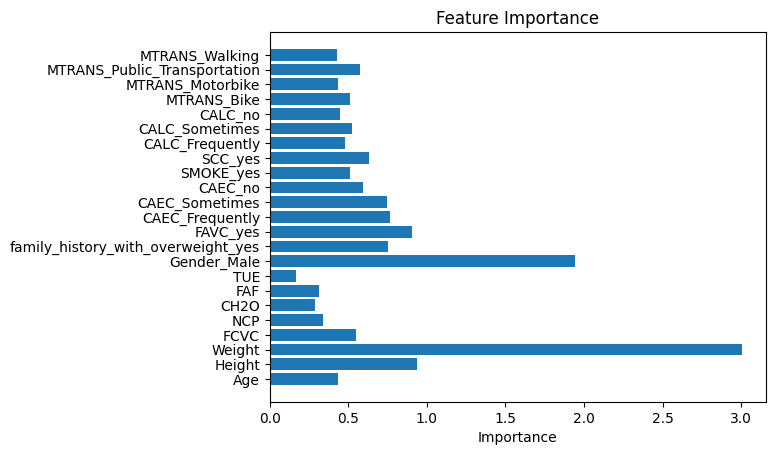

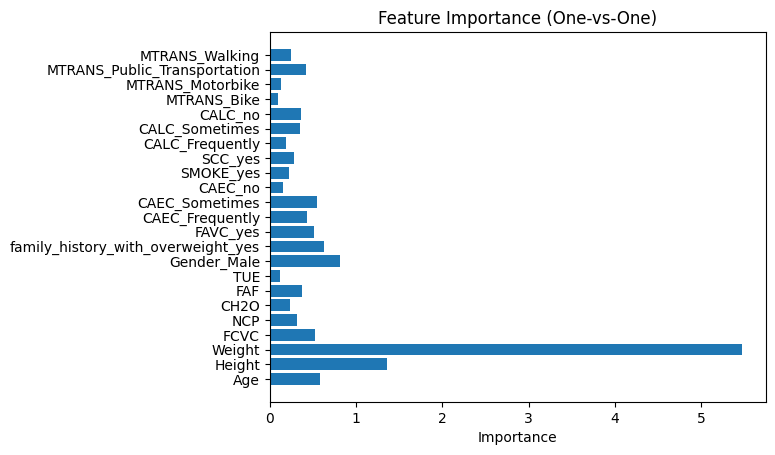

In [20]:
# Feature importance
# model_ova.coef_ ÊòØ OvA Ê®°Âûã‰∏≠ÔºåÊØè‰∏™Á±ªÂà´ÂØπÂ∫îÁöÑÈÄªËæëÂõûÂΩíÁ≥ªÊï∞
# print(model_ova.coef_)
# ÂØπÊØè‰∏™ÁâπÂæÅÂú®ÊâÄÊúâÂàÜÁ±ªÂô®‰∏≠ÁöÑÁªùÂØπÁ≥ªÊï∞ÔºåÂØπÊØè‰∏ÄÂàóÂÅöÊìç‰ΩúÂèñÂπ≥ÂùáÂÄºÔºå‰Ωú‰∏∫ËØ•ÁâπÂæÅÊï¥‰ΩìÁöÑÈáçË¶ÅÊÄß
feature_importance = np.mean(np.abs(model_ova.coef_), axis=0) # ÂæóÂà∞ÊØèÂàóÁâπÂæÅÂÄºÁöÑÁªùÂØπÂπ≥ÂùáÊï∞
plt.barh(X.columns, feature_importance)
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.show()

# For One vs One model
# Collect all coefficients from each underlying binary classifier
# model_ovo.estimators_ ÊòØ OvO Ê®°Âûã‰∏≠ÊâÄÊúâÁöÑÂ≠êÂàÜÁ±ªÂô®ÔºàÂÖ± k(k-1)/2 ‰∏™Ôºâ
# ÊØè‰∏™ est ÊòØ‰∏Ä‰∏™ÈÄªËæëÂõûÂΩíÂàÜÁ±ªÂô®, est.coef_ ÊòØÂΩ¢Â¶Ç [1, n_features] ÁöÑÊï∞ÁªÑÔºåË°®Á§∫ÊØè‰∏™ÁâπÂæÅÁöÑÊùÉÈáç
coefs = np.array([est.coef_[0] for est in model_ovo.estimators_])

# Now take the mean across all those classifiers
# Ë∑ü OvA ‰∏ÄÊ†∑ÔºåÂØπÊâÄÊúâÂàÜÁ±ªÂô®‰∏≠Âêå‰∏Ä‰∏™ÁâπÂæÅÁöÑÁªùÂØπÂÄºÁ≥ªÊï∞ÔºåÂØπÊØè‰∏ÄÂàóÂÅöËøõË°åÂπ≥ÂùáÔºå‰Ωú‰∏∫ËØ•ÁâπÂæÅÁöÑÊúÄÁªàÈáçË¶ÅÊÄß
feature_importance = np.mean(np.abs(coefs), axis=0)

# Plot feature importance
plt.barh(X.columns, feature_importance)
plt.title("Feature Importance (One-vs-One)")
plt.xlabel("Importance")
plt.show()

<details><summary>Click here for the solution</summary>

```python
# Feature importance
feature_importance = np.mean(np.abs(model_ova.coef_), axis=0)
plt.barh(X.columns, feature_importance)
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.show()
```
```python

# For One vs One model
# Collect all coefficients from each underlying binary classifier
coefs = np.array([est.coef_[0] for est in model_ovo.estimators_])

# Now take the mean across all those classifiers
feature_importance = np.mean(np.abs(coefs), axis=0)

# Plot feature importance
plt.barh(X.columns, feature_importance)
plt.title("Feature Importance (One-vs-One)")
plt.xlabel("Importance")
plt.show()
```

</details>


Q3. Write a function `obesity_risk_pipeline` to automate the entire pipeline: <br>
<ol>
<li> Loading and preprocessing the data </li>
<li> Training the model </li>
<li> Evaluating the model </li>
</ol>
The function should accept the file path and test set size as the input arguments.


In [21]:
def obesity_risk_pipeline(data_path, test_size=0.2):
    # Load data
    data = pd.read_csv(data_path)

    # Standardizing continuous numerical features
    continuous_columns = data.select_dtypes(include=['float64']).columns.tolist()
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(data[continuous_columns])
    
    # Converting to a DataFrame
    scaled_df = pd.DataFrame(scaled_features, columns=scaler.get_feature_names_out(continuous_columns))
    
    # Combining with the original dataset
    scaled_data = pd.concat([data.drop(columns=continuous_columns), scaled_df], axis=1)

    # Identifying categorical columns
    categorical_columns = scaled_data.select_dtypes(include=['object']).columns.tolist()
    categorical_columns.remove('NObeyesdad')  # Exclude target column
    
    # Applying one-hot encoding
    encoder = OneHotEncoder(sparse_output=False, drop='first')
    encoded_features = encoder.fit_transform(scaled_data[categorical_columns])
    
    # Converting to a DataFrame
    encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_columns))
    
    # Combining with the original dataset
    prepped_data = pd.concat([scaled_data.drop(columns=categorical_columns), encoded_df], axis=1)
    
    # Encoding the target variable
    prepped_data['NObeyesdad'] = prepped_data['NObeyesdad'].astype('category').cat.codes

    # Preparing final dataset
    X = prepped_data.drop('NObeyesdad', axis=1)
    y = prepped_data['NObeyesdad']
   
    # Splitting data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42, stratify=y)
    
    # Training and evaluation
    model = LogisticRegression(multi_class='multinomial', max_iter=1000)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))

# Call the pipeline function with file_path
obesity_risk_pipeline(file_path, test_size=0.2)

Accuracy: 0.8794326241134752


<details><summary>Click here for the solution</summary>

```python
def obesity_risk_pipeline(data_path, test_size=0.2):
    # Load data
    data = pd.read_csv(data_path)

    # Standardizing continuous numerical features
    continuous_columns = data.select_dtypes(include=['float64']).columns.tolist()
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(data[continuous_columns])
    
    # Converting to a DataFrame
    scaled_df = pd.DataFrame(scaled_features, columns=scaler.get_feature_names_out(continuous_columns))
    
    # Combining with the original dataset
    scaled_data = pd.concat([data.drop(columns=continuous_columns), scaled_df], axis=1)

    # Identifying categorical columns
    categorical_columns = scaled_data.select_dtypes(include=['object']).columns.tolist()
    categorical_columns.remove('NObeyesdad')  # Exclude target column
    
    # Applying one-hot encoding
    encoder = OneHotEncoder(sparse_output=False, drop='first')
    encoded_features = encoder.fit_transform(scaled_data[categorical_columns])
    
    # Converting to a DataFrame
    encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_columns))
    
    # Combining with the original dataset
    prepped_data = pd.concat([scaled_data.drop(columns=categorical_columns), encoded_df], axis=1)
    
    # Encoding the target variable
    prepped_data['NObeyesdad'] = prepped_data['NObeyesdad'].astype('category').cat.codes

    # Preparing final dataset
    X = prepped_data.drop('NObeyesdad', axis=1)
    y = prepped_data['NObeyesdad']
   
    # Splitting data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42, stratify=y)
    
    # Training and evaluation
    model = LogisticRegression(multi_class='multinomial', max_iter=1000)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))

# Call the pipeline function with file_path
obesity_risk_pipeline(file_path, test_size=0.2)
```
</details>


### Congratulations! You're ready to move on to your next lesson!
 
## Author
 
<a href="https://www.linkedin.com/in/abhishek-gagneja-23051987/" target="_blank">Abishek Gagneja</a>
 
 
 ### Other Contributors
 
<a href="https://www.linkedin.com/in/jpgrossman/" target="_blank">Jeff Grossman</a>



<!--
## Changelog
 
| Date | Version | Changed by | Change Description |

|:------------|:------|:------------------|:---------------------------------------|

| 2024-11-05 | 1.0  Abhishek Gagnejan    | Fresh version created |
| 2025-05-13 | 1.1  Anita Verma    | Added the solution code for Ovo model Q2  |


<h3 align="center"> ¬© IBM Corporation. All rights reserved. <h3/>
